# Data Science Challenge
The provided structure is offered as a guiding framework, but you are encouraged to tailor it to your preferences. Feel free to import alternative libraries, and feel empowered to include new cells that suit your specific requirements and creative insights. Your unique approach and explorations are highly valued.

# Business problem
Predict credit risk of customers.

Credit risk refers to the potential financial loss that a lender might incur if a borrower fails to repay a loan or credit obligation. It's the uncertainty about whether borrowers will honor their financial commitments.

We aims to predict their customers' credit risk for several reasons:

1. **Risk Assessment:** By predicting whether a customer is a good or bad risk, banks can assess the likelihood of loan defaults or late payments, helping them make informed lending decisions.

2. **Profitability:** Accurate credit risk prediction allows to offer appropriate interest rates based on a customer's risk profile, ensuring fair compensation for the level of risk involved.

3. **Minimize Losses:** Identifying high-risk customers helps allocate resources effectively, focusing more attention on potential problem cases and minimizing potential financial losses.

4. **Customer Segmentation:** Predicting credit risk allows to segment customers based on risk profiles, tailoring financial products and services to individual needs and risk tolerance.

In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

# models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import dataset

In [99]:
# Load the dataset
data = pd.read_csv('../data/dataset.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,...,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Credit risk,Number of Accounts
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,1,1
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,2,2
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,1,1
3,3,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,1,1
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,2,2


# Task 1: Data Preprocessing
1. Handle missing values (if any)
2. Convert categorical variables to numeric using one-hot encoding
3. Split the data into features (X) and target variable (y)

In [100]:
# Dropping useless column.
data.drop(columns=['Unnamed: 0'], inplace=True)

# Translating the label to be binary: f(x) =  x - 1; [2,1] -> [1,0]
data['Credit risk']-=1

Loocking at dataset information

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [102]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 1000 rows and 22 columns.


## Handle missing values

Looking at missing values.

In [103]:
data.isna().sum()

Status of existing checking account                         0
Duration in months                                          0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

Looking at duplicated values.

In [104]:
print(f'Duplicated Values : {data.duplicated().sum()}')

Duplicated Values : 0


**No** missing or duplicate values.

## Convert categorical variables to numeric

In [105]:
# selecting all columns with type equal to object(string)
object_columns = data.select_dtypes(include=['object']).columns

# Converting categorical variables to numeric 
data_encoded = pd.get_dummies(data, columns=object_columns)

# Viewing the result to verify
data_encoded.head()

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit risk,Number of Accounts,Status of existing checking account_A11,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign worker_A201,Foreign worker_A202
0,6,1169,4,4,67,2,1,0,1,1,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,2,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,2,1,...,0,1,0,0,1,0,1,0,1,0


## Split the data into features and target variable

Our primary target variable is 'Credit risk.' 

It is imperative to substantiate our predictive objective, which pertains to assessing the quality of credit assignments. 

In [106]:
# target : [1,2] -> [0,1]
y = data_encoded['Credit risk'] 

# features
X = data_encoded.loc[:, data_encoded.columns != 'Credit risk']

# Task 2: Exploratory Data Analysis (EDA)
1. Perform statistical analysis
2. Visualize key features and their relationships with the target variable

## Looking into

I will get categorical features, numerical features and target feature separate lists in order to turn data visualization and exploration easier.

In [107]:
numerical_features = data.select_dtypes('number').columns.tolist()
categorical_features = data.select_dtypes('object').columns.tolist()

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)

There are 9 numerical features. They are: 
['Duration in months', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for', 'Credit risk', 'Number of Accounts']

There are 13 categorical features. They are: 
['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']


Let's now use the `describe` method for more information about numeric variables.

In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration in months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment rate in percentage of disposable income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present residence since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age in years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Number of existing credits at this bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Number of people being liable to provide maintenance for,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Credit risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
Number of Accounts,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


Some interesting points:

- The average age is approximately 36 years.
- The average credit amount is approximately 3271.
- The average credit service duration is 21 months.
- Looks like there are some outliers.

## Target Distribution

Let's now examine the quantity of each credit type to understand its distribution within our dataset.

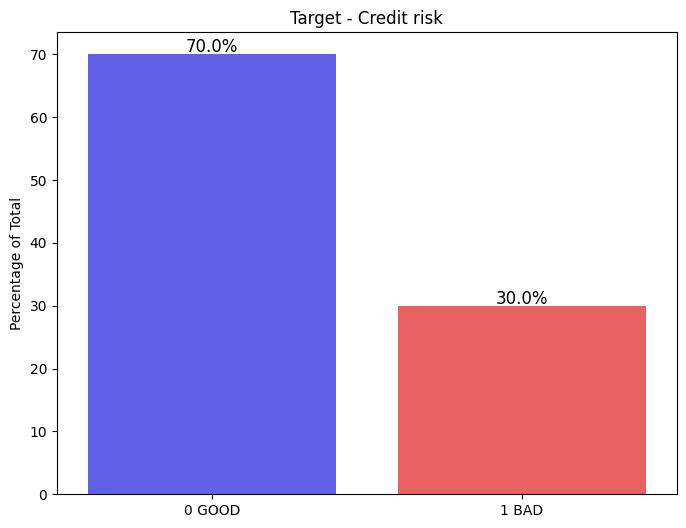

In [109]:
value_counts = data['Credit risk'].value_counts().sort_index()
total_samples = len(data)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values / total_samples * 100, palette=['blue', 'red'], alpha=0.7)
plt.ylabel('Percentage of Total')
plt.title('Target - Credit risk')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(value_counts.index, ['0 GOOD', '1 BAD'])

plt.show()

Insights:

The slight class imbalance in the target variable, with approximately 30% of customers falling into the bad risk category, impacts my machine learning model by potentially biasing it toward the majority class and affecting its predictive performance, especially for the minority class. To address this, I need to utilize evaluation metrics beyond accuracy, such as precision, recall, and F1-score, and consider resampling techniques or algorithm choices that can help mitigate the imbalance. This ensures that my model provides meaningful predictions for both good and bad risk customers in credit risk assessment.

## Numerical features distributions

I will examine the distributions of numerical features below to identify any skewed distributions and determine the most common values for the bank's customers' numeric attributes

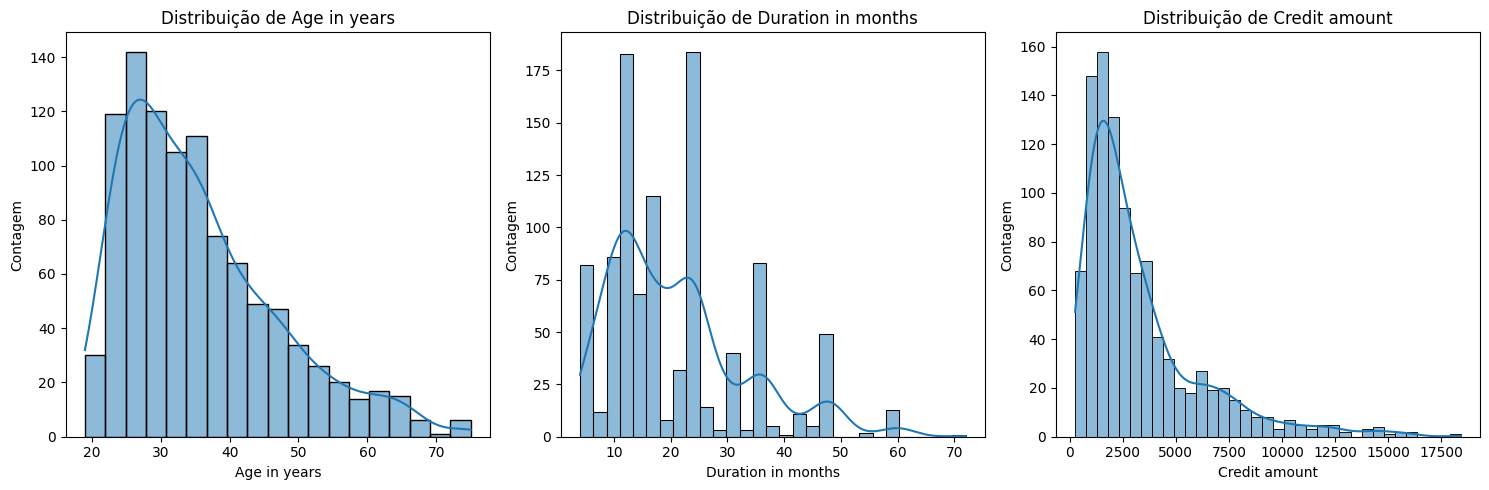

In [110]:
numeric_columns = ['Age in years',  'Duration in months', 'Credit amount']

plt.figure(figsize=(15, 5)) 

for i, column in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)  
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')

plt.tight_layout() 
plt.show()

Insights

Here are some key insights based on the analysis of customer data:

1. **Age Distribution**:
   - Most of the customers fall within the age range of 20 to 40 years old. This suggests that the bank's customer base is predominantly composed of individuals in this age group.

2. **Credit Amount Distribution**:
   - The distribution of credit amounts is right-skewed, indicating that most customers have low credit balances. However, there are some outliers with very high credit balances. This suggests that while the majority of customers have smaller loans, there are a few customers with substantial loan amounts.

3. **Duration in Months**:
   - A significant portion of customers opt for either 12-month or 24-month loan durations when using the bank's credit service. This indicates that the bank offers popular loan terms of 1 year and 2 years, which are commonly selected by customers.

## Categorical features distributions

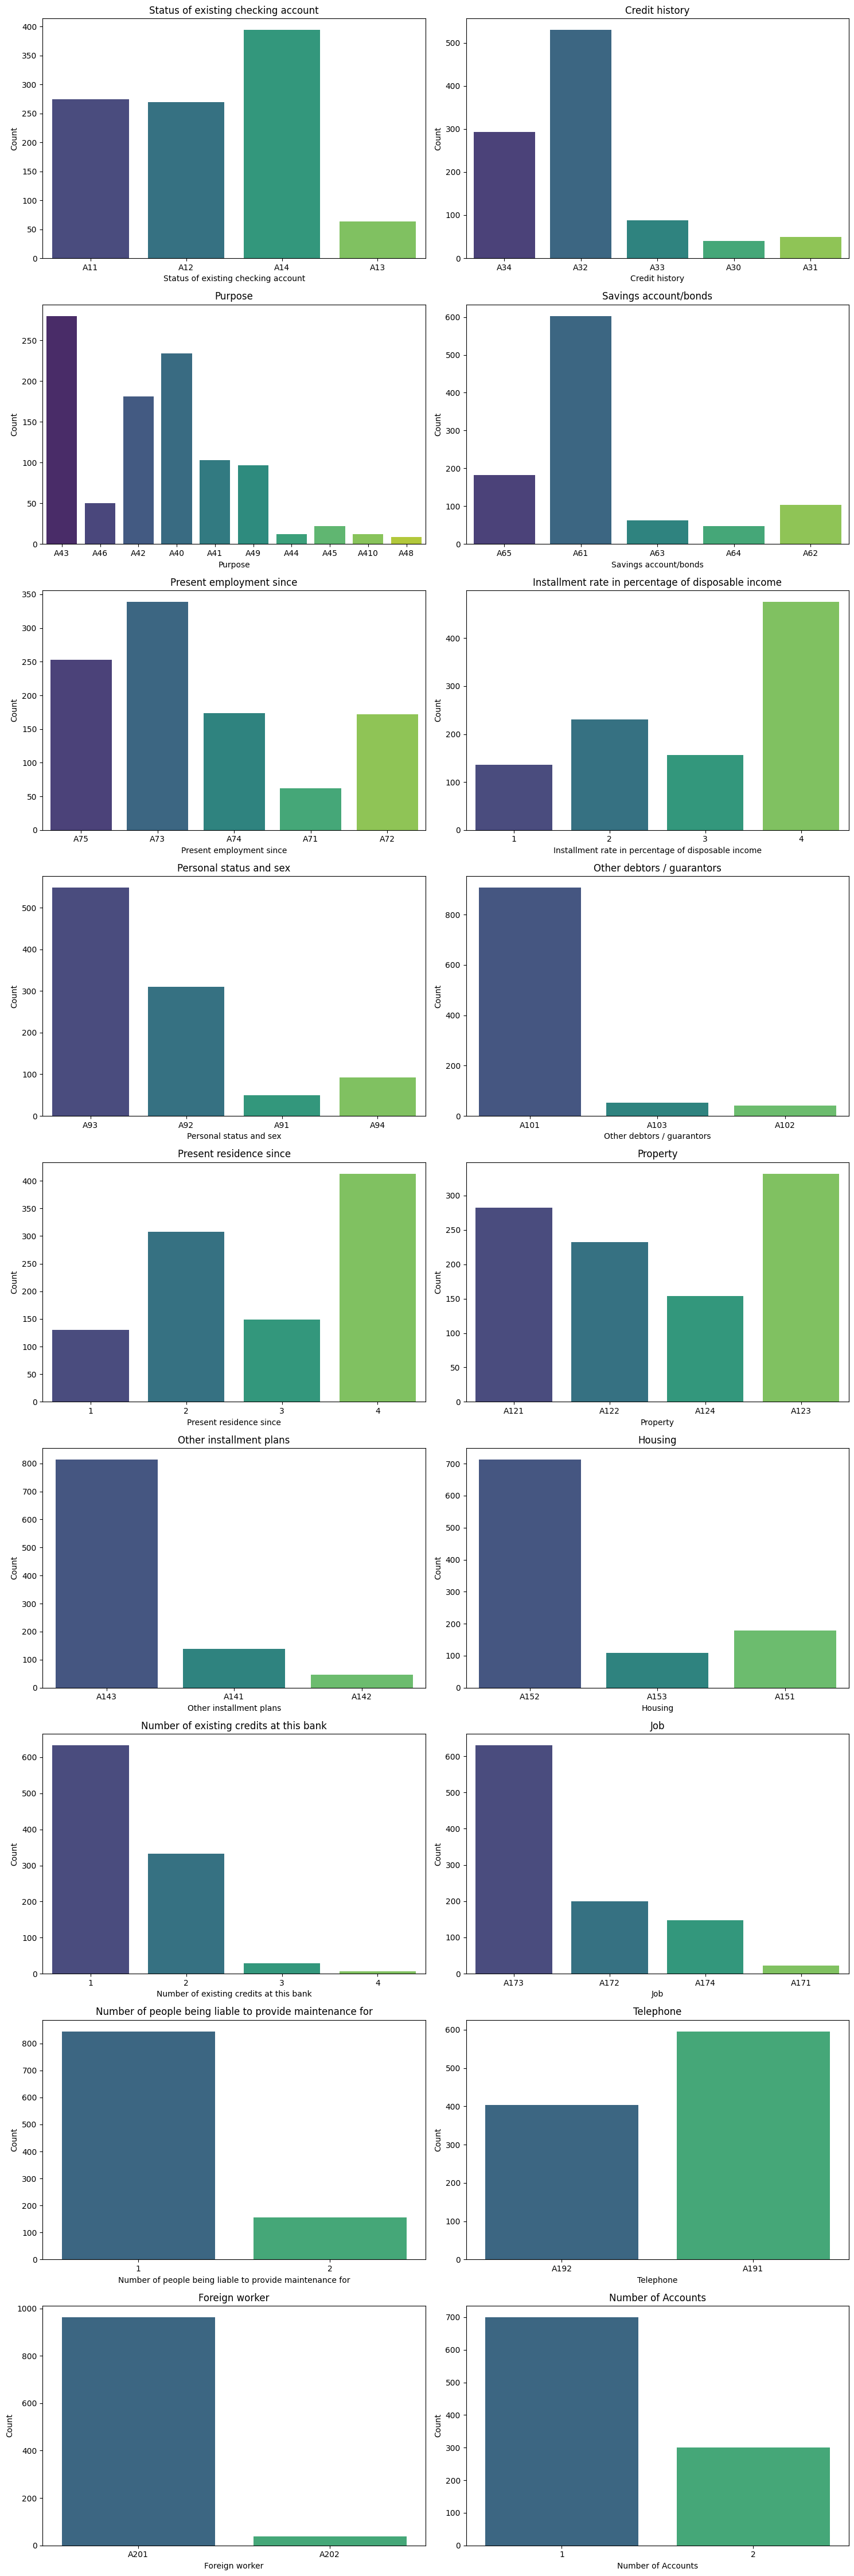

In [111]:
columns_to_plot = data.drop(columns=['Age in years',  'Duration in months', 'Credit amount', 'Credit risk']).columns

num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)  

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout() 
plt.show()

### Correlation matrix
I will examine the correlation matrix in order to identify any linear relationships between the features in the data, particularly with the target variable, and assess the strength and direction of these relationships.

In [112]:
corr_matrix = data.corr(numeric_only=True)

In [113]:
corr_matrix['Credit risk'].sort_values(ascending=False)

Number of Accounts                                          1.000000
Credit risk                                                 1.000000
Duration in months                                          0.214927
Credit amount                                               0.154739
Installment rate in percentage of disposable income         0.072404
Present residence since                                     0.002967
Number of people being liable to provide maintenance for   -0.003015
Number of existing credits at this bank                    -0.045732
Age in years                                               -0.091127
Name: Credit risk, dtype: float64

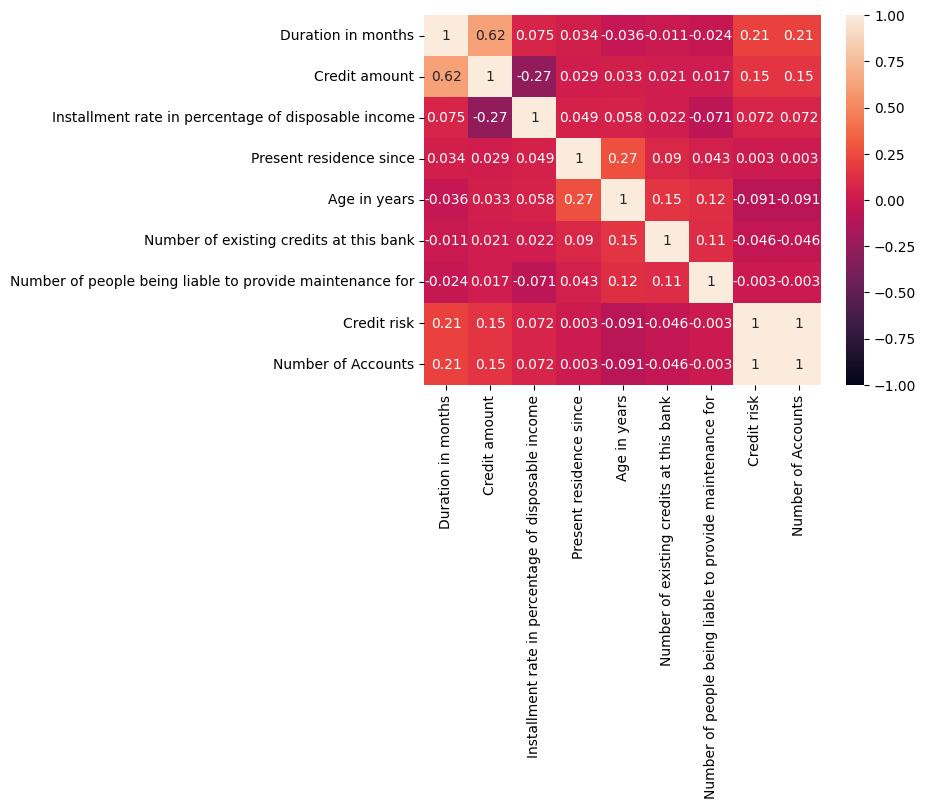

In [114]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights

1. The moderately strong positive correlation between **Credit amount** and **Duration in months** suggests that, on average, larger loan amounts are associated with longer credit durations. This relationship implies a potential higher risk for lenders as longer durations may increase exposure to credit default. Conversely, smaller loan amounts tend to have shorter durations, indicating lower risk for both borrowers and lenders. This underscores the importance of considering both factors in credit risk assessment.

2.  **Credit amount** and **Installment rate in percentage of disposable income** suggests a relatively weak negative correlation. This indicates that, on average, as the **Credit amount** increases, the **Installment rate** tends to decrease slightly, and vice versa. This negative relationship implies that customers with larger loans may opt for longer repayment durations or lower installment rates relative to their disposable income.

3. Significantly, the **Number of Accounts** column serves as the foundation for our target variable.

4. The correlation coefficient of 0.21 between **Credit Risk** and **Duration in months** suggests a relatively weak positive correlation between these two variables. This indicates that, to some extent, as the duration of credit services in months increases, there is a slight tendency for credit risk to increase as well. However, it's important to emphasize that the correlation strength is not very high, implying that other factors likely play a more significant role in determining credit risk.

c:\Users\breno.melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


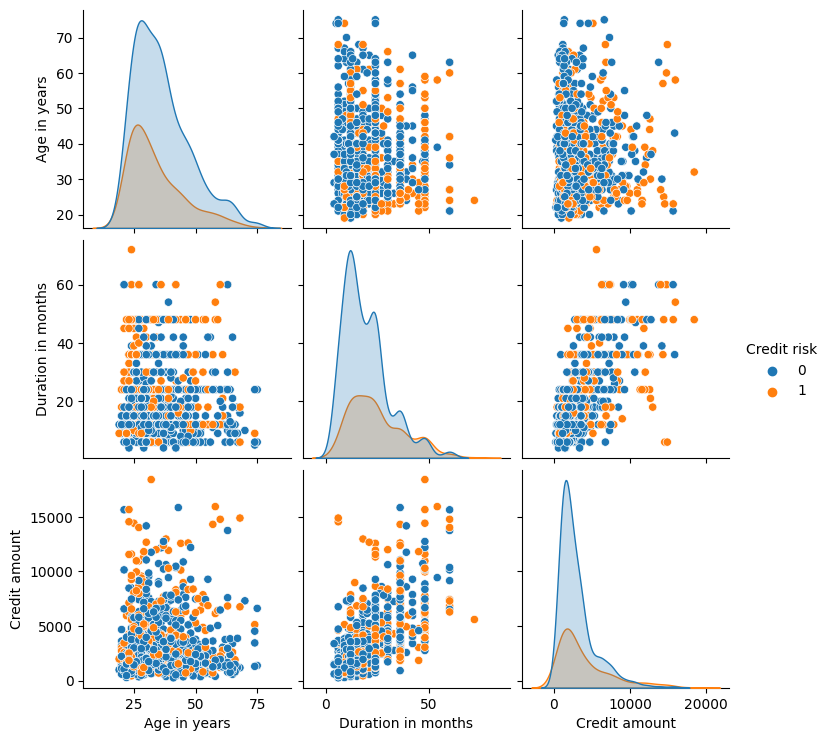

In [115]:
sns.pairplot(data=data, hue='Credit risk', vars=numeric_columns)
plt.show()

## Features vs Credit Risk

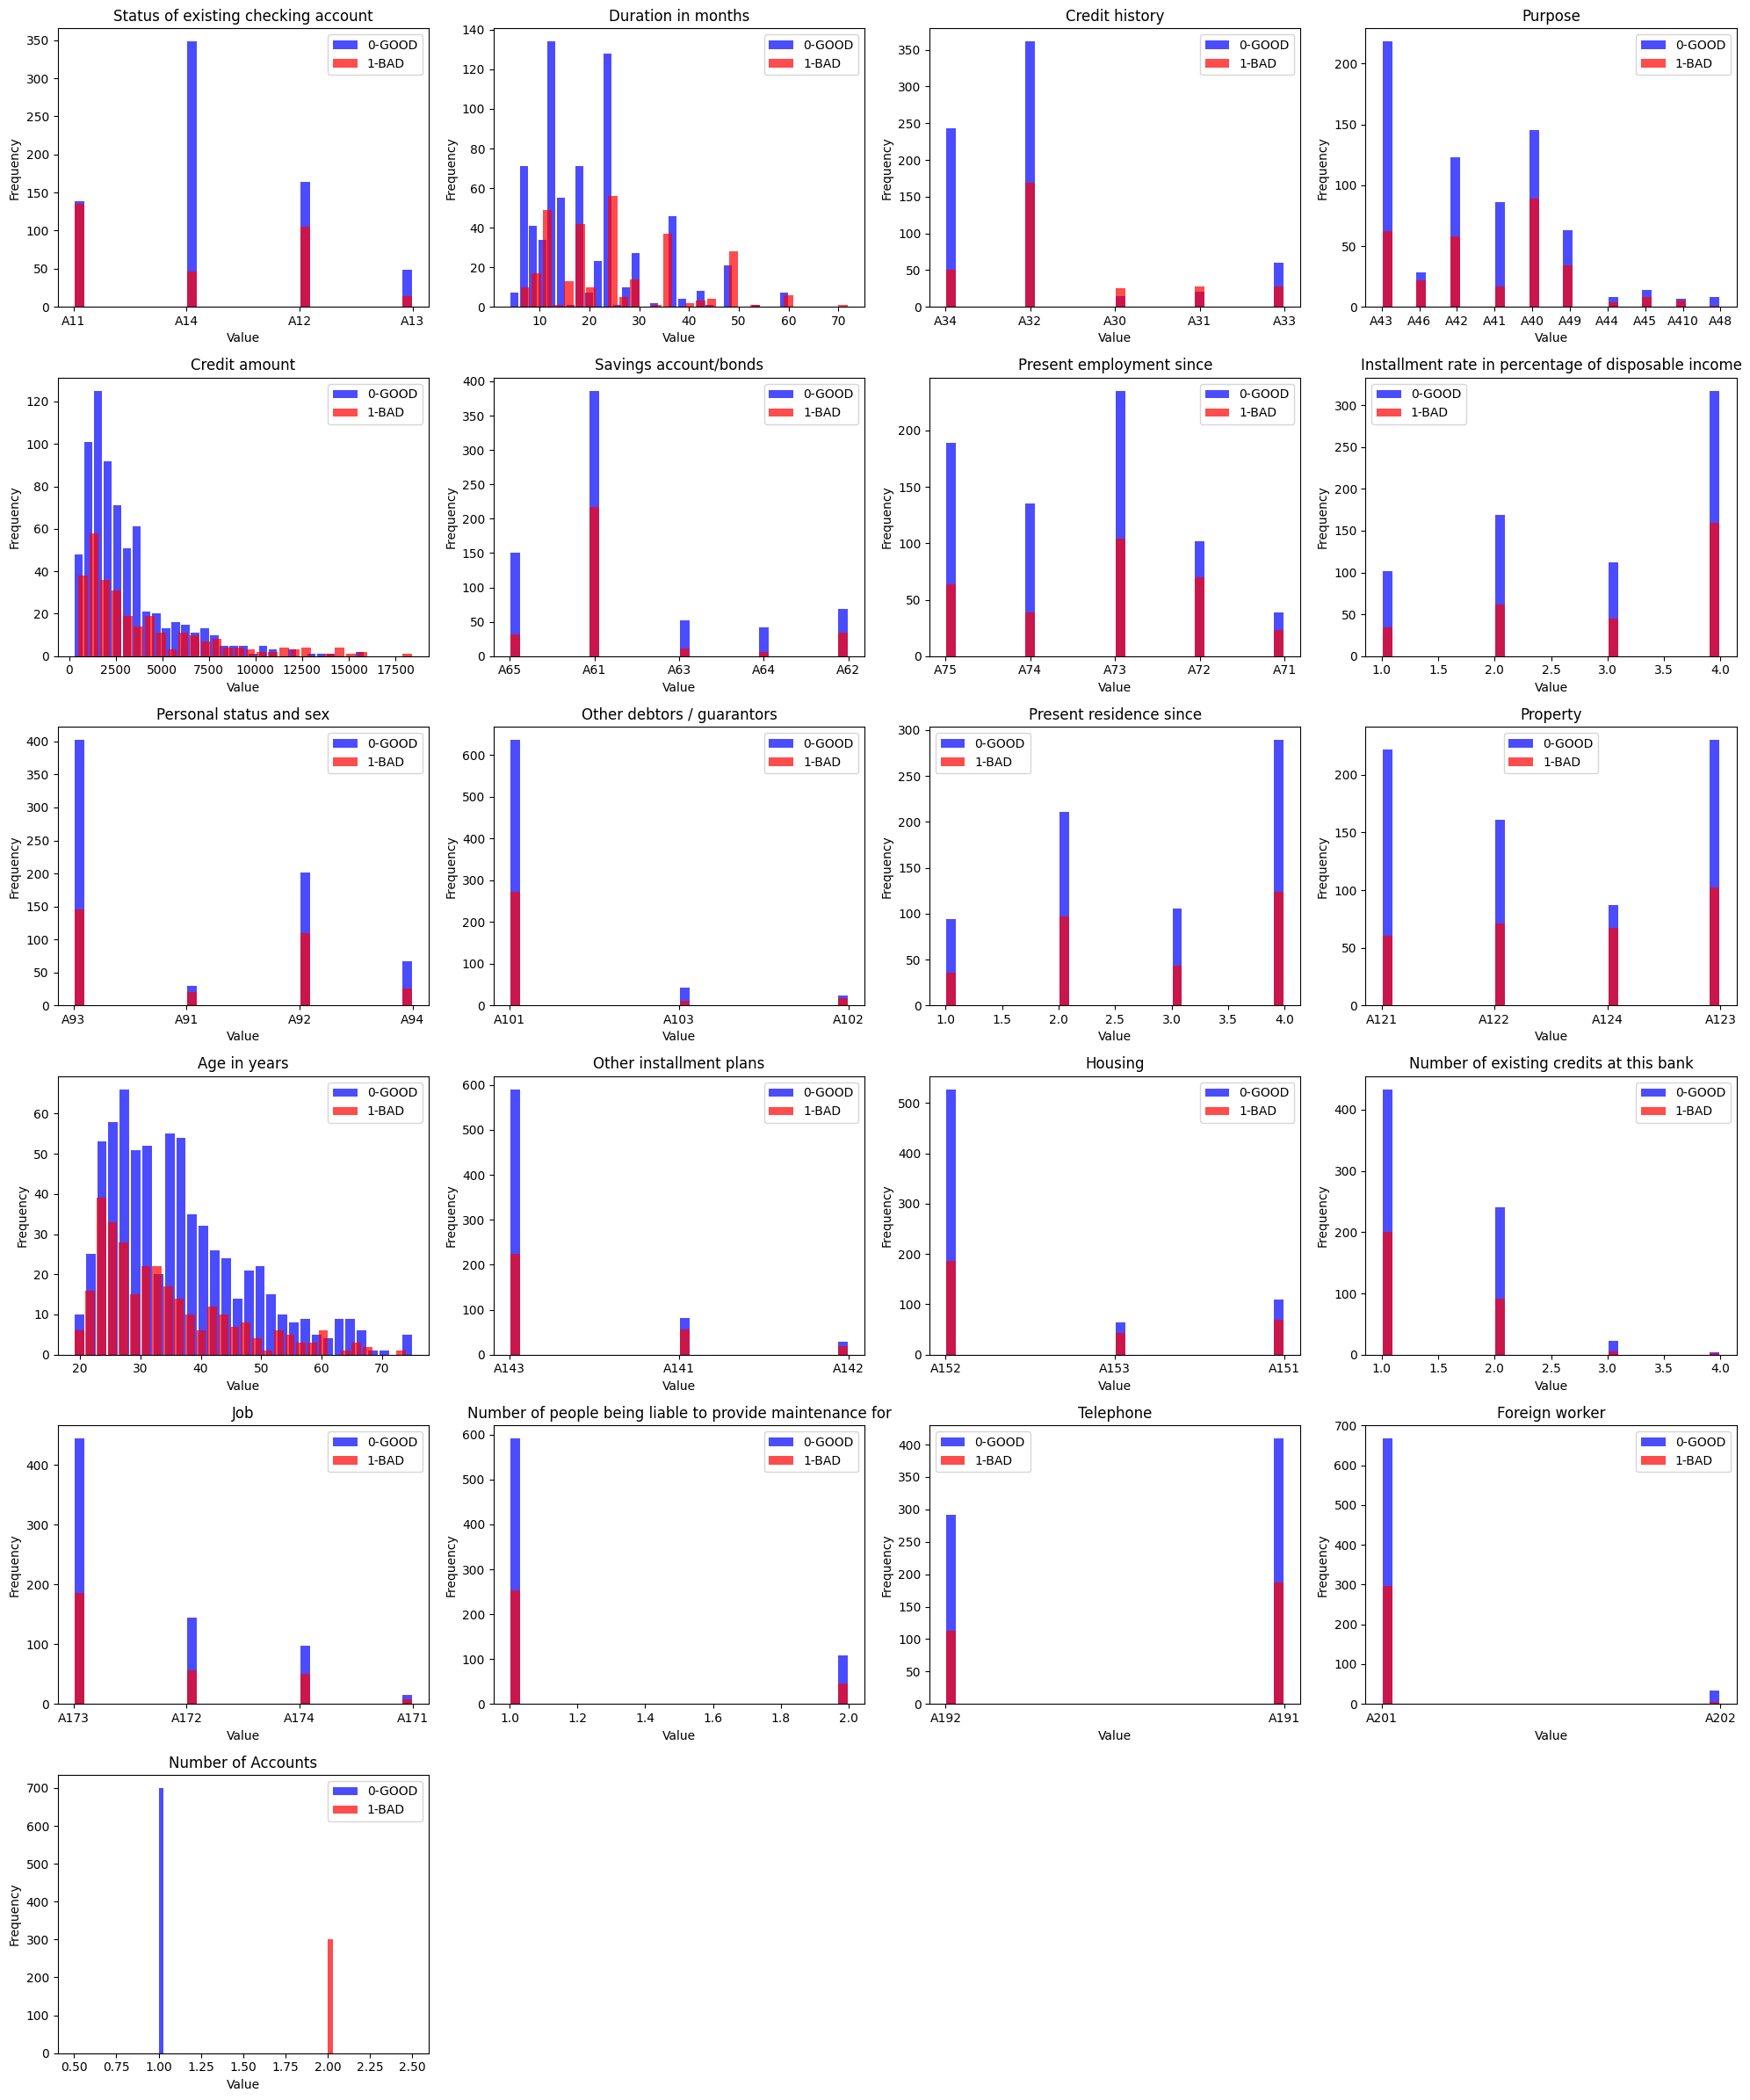

In [116]:
def plot_multiple_histograms(df:pd.DataFrame, features:list):
    num_features = len(features)
    num_rows = (num_features + 3) // 4  
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))

    for i, feature in enumerate(features):
        row = i // 4  
        col = i % 4   

        axes[row, col].hist(df[df['Credit risk'] == 0][feature], bins=30, color='blue', alpha=0.7, label='0-GOOD', rwidth=0.85)
        axes[row, col].hist(df[df['Credit risk'] == 1][feature], bins=30, color='red', alpha=0.7, label='1-BAD', rwidth=0.85)
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_title(f'{feature}')
        axes[row, col].legend()

    for i in range(num_features, num_rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

features_to_plot = data.drop(columns=['Credit risk']).columns

plot_multiple_histograms(data, features_to_plot)

Analysis:

1. It is evident that our dataset is relatively small, comprising only 1000 data records. Furthermore, a notable imbalance exists between the instances categorized as "Good credit" (70%) and "Bad credit" (30%).

2. Notably, the column "Number of Accounts" serves as the basis for our target variable. However, it is imperative to recognize that the number of accounts does not singularly dictate either "Good credit" or "Bad credit" status. Consequently, this will introduce bias into our model, as the relationship between the number of accounts and credit quality is not linear.

3. The majority of customers have a credit history labeled as 'A32.' It would be insightful to understand the significance of each code in relation to their credit history.

4. Young customers tend to present higher credit risk. This makes sense since younger people usually don't have financial stability.

5. Customers who take higher credit amounts tend to present higher risk. This makes total sense. The higher the credit amount taken, the harder it is to pay it.

6. Credit amount and Duration are strongly positively correlated. Credit services with longer durations generally are associated with higher credit amounts and vice-versa. Furthermore, a weak positive correlation exists between these two features and risk. This makes sense because a customer holding a credit service for a longer duration with a high credit amount taken presents higher risk.

With the exception of the aforementioned issue related to the "Number of Accounts" column, the data distribution within each subcategory of credit type demonstrates relative similarity. 

It might have been anticipated that loan applications with significantly higher credit amounts would exhibit a higher rejection rate; however, the data illustrates otherwise. Both subgroups within the credit types conform to an exponential distribution. 

Looking ahead, we will proceed to develop a data balancing technique to ensure that our forthcoming model does not face challenges in discerning one target category over the other, given the discrepancy in data volume between them.

# Task 3: Model Selection and Training
1. Choose a suitable classification algorithm.
2. Split the data into training and testing sets.
3. Train the selected model using the training data.



I'm going to use four different classification algorithms to train models:
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

As previously discussed, we will remove the 'Number of Accounts' feature to prevent biasing our model.

In [117]:
# Spliting the data into training and testing sets (e.g. 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Number of Accounts']), y, test_size=0.2, random_state=42)

As previously discussed, there is a substantial imbalance in the number of 'GOOD' and 'BAD' target values. To address this, we will balance the data within the training set and then evaluate how this impacts the chosen model's performance metrics.

In [118]:
# Concatenate training data and labels
train_data = pd.concat([X_train, y_train], axis=1)

# Separating majority and minority classes
majority_class = train_data[train_data['Credit risk'] == 0]
minority_class = train_data[train_data['Credit risk'] == 1]

# Performing oversampling of the minority class
minority_oversampled = resample(minority_class, 
                                replace=True,             
                                n_samples=len(majority_class), 
                                random_state=42)         

# Combining the majority class with the oversampled minority class
oversampled_data = pd.concat([majority_class, minority_oversampled])

# Separating features and labels after oversampling
X_train_balanced = oversampled_data.drop('Credit risk', axis=1)
y_train_balanced = oversampled_data['Credit risk']

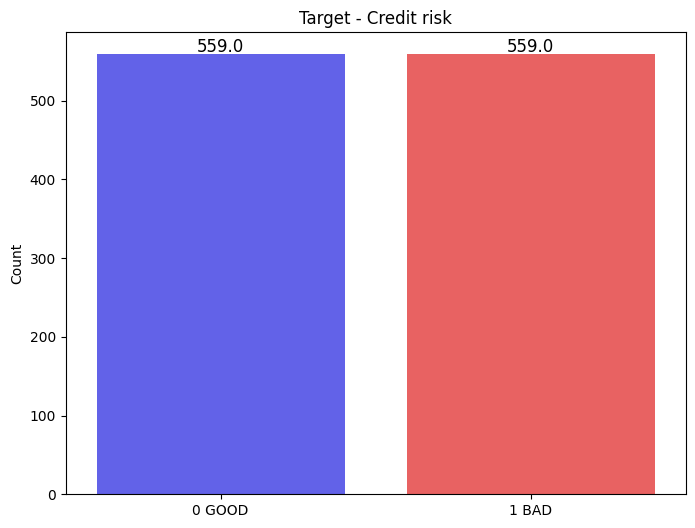

In [119]:
value_counts = oversampled_data['Credit risk'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=['blue', 'red'], alpha=0.7)
plt.ylabel('Count')
plt.title('Target - Credit risk')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(value_counts.index, ['0 GOOD', '1 BAD'])

plt.show()

Now, within the model's training dataset, we have classes with an equal number of samples.

Using the cross-validation technique, we will assess the performance of these four algorithms with both balanced and unbalanced data, resulting in a total of eight models. We will employ the following metrics to evaluate the models:

1. Accuracy
2. Precision
3. Recall
4. Area under the ROC curve

Subsequently, we will generate a DataFrame containing the results of each model to facilitate visualization and the selection of the best-performing model.

In [133]:
# Creating the Models Using Cross-Validation
logreg_balanced  = cross_validate(LogisticRegression(solver='liblinear'), X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
logreg = cross_validate(LogisticRegression(solver='liblinear'), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanced  = cross_validate(DecisionTreeClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
trees = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanced  = cross_validate(RandomForestClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
forest = cross_validate(RandomForestClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanced  = cross_validate(XGBClassifier(), X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
xgb = cross_validate(XGBClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

summary = pd.DataFrame({
            'labels': ['accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanced': [logreg_balanced['test_accuracy'].mean(), logreg_balanced['test_precision'].mean(), logreg_balanced['test_recall'].mean(), logreg_balanced['test_roc_auc'].mean()],
            'logreg': [logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
            'trees_balanced': [trees_balanced['test_accuracy'].mean(), trees_balanced['test_precision'].mean(), trees_balanced['test_recall'].mean(), trees_balanced['test_roc_auc'].mean()],
            'trees': [trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
            'forest_balanced': [forest_balanced['test_accuracy'].mean(), forest_balanced['test_precision'].mean(), forest_balanced['test_recall'].mean(), forest_balanced['test_roc_auc'].mean()],
            'forest': [forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
            'xgb_balanced': [xgb_balanced['test_accuracy'].mean(), xgb_balanced['test_precision'].mean(), xgb_balanced['test_recall'].mean(), xgb_balanced['test_roc_auc'].mean()],
            'xgb': [xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: lightgreen; color: black' if x >= 0.8 else '')

,accuracy,precision,recall,roc_auc
logreg_balanced,0.732579,0.727879,0.744160,0.794095
logreg,0.743750,0.597604,0.460799,0.771423
trees_balanced,0.824692,0.775997,0.915975,0.824751
trees,0.667500,0.450574,0.456633,0.607612
forest_balanced,0.894467,0.863208,0.939189,0.968343
forest,0.751250,0.646371,0.377721,0.771023
xgb_balanced,0.874760,0.831424,0.940991,0.954484
xgb,0.727500,0.556326,0.473299,0.756809


In general, the balanced data exhibited superior performance across all four metrics. Among the algorithms, **Random Forests** consistently delivered the most favorable results. <br>

Furthermore, Random Forest exhibits relative robustness towards irrelevant features due to the random selection of features in each tree. This approach contributes to reducing the influence of features that may be deemed irrelevant or noisy for the specific problem at hand.<br>

Consequently, the combination of this model with the balanced dataset has been selected as the preferred choice for this project. 

In [121]:
random_forest_model = RandomForestClassifier()  

random_forest_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

# Task 4: Model Evaluation

1. Evaluate the model's performance on the testing data
2. Compute and display essential evaluation metrics
3. Provide insights and conclusions based on the results


In [122]:
y_pred = random_forest_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       141
           1       0.71      0.51      0.59        59

    accuracy                           0.80       200
   macro avg       0.77      0.71      0.73       200
weighted avg       0.79      0.80      0.78       200



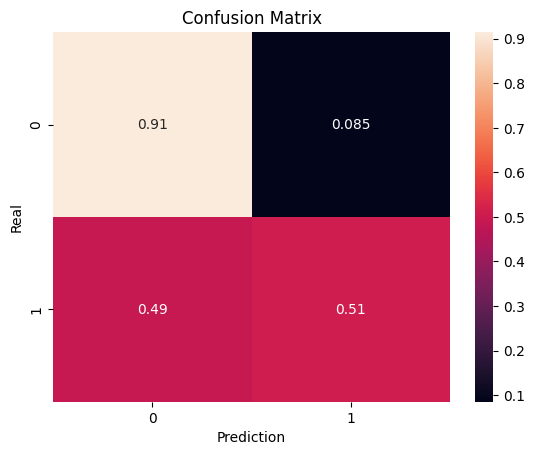

In [123]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real')
ax.set_xlabel('Prediction')
plt.show()

The classification report provides a detailed evaluation of the model's performance. For Class 0, which represents one of the classes, the model exhibits strong precision and high recall, indicating that it correctly identifies the majority of actual instances in this class while maintaining a low false-positive rate. However, for Class 1, the model's precision is slightly lower, suggesting that it correctly identifies a good portion of the actual instances but also produces some false positives. The recall for Class 1 indicates that the model misses some actual instances in this class. The overall accuracy is 81%, reflecting the proportion of correct predictions across both classes. <br>

But this is not enough, as we want to identify when a credit is bad. So let's understand why the model is misclassifying this class.
 

In [124]:
def check_overfitting(model, X_train:np.array, X_test:np.array, y_test:np.array):
    # Create lists to store accuracies on training and test data
    train_accuracies = []
    test_accuracies = []

    # Vary the size of the training set
    sizes = np.arange(0.1, 1.1, 0.1)  # For example, from 10% to 100% of the training set

    for size in sizes:
        # Calculate the size of the training subset based on the percentage
        subset_size = int(size * len(X_train))
        
        # Extract a random subset from the training data
        X_subset = X_train_balanced.iloc[:subset_size]
        y_subset = y_train_balanced.iloc[:subset_size]
        
        # Create and train a Random Forest model with this subset
        model_balanced = model
        
        # Training the model
        model_balanced.fit(X_subset, y_subset)
        
        # Make predictions on the training and test data
        y_train_pred = model_balanced.predict(X_subset)
        y_test_pred = model_balanced.predict(X_test)
        
        # Calculate accuracies on the training and test data
        train_accuracy = accuracy_score(y_subset, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Store the accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(16, 5))
    sns.lineplot(x=sizes, y=train_accuracies, label='Training', marker='o')
    sns.lineplot(x=sizes, y=test_accuracies, label='Test', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves to Check Overfitting')
    plt.legend()
    plt.grid(True)
    plt.show()

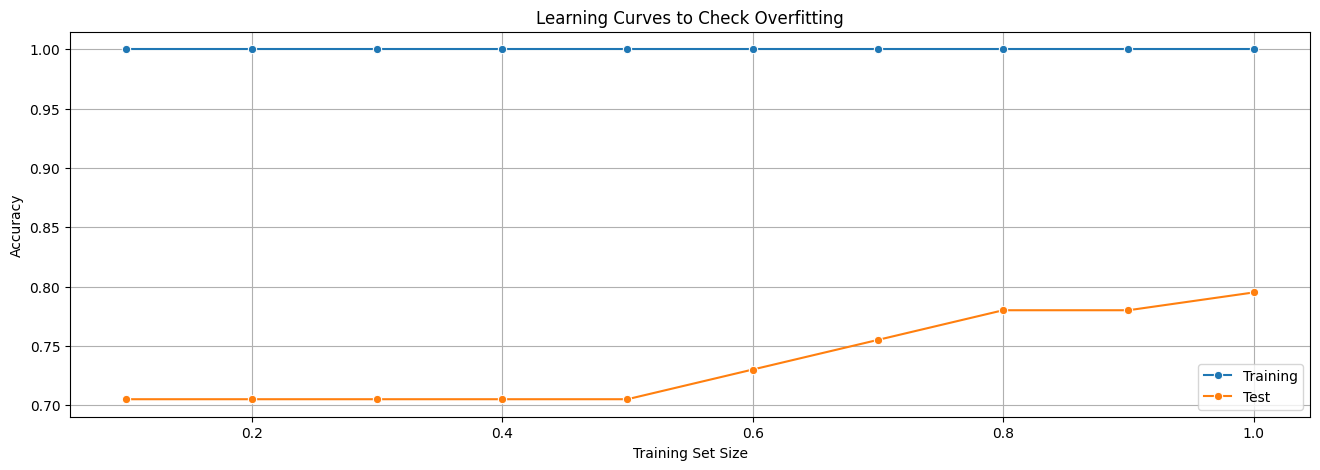

In [125]:
check_overfitting(random_forest_model, X_train_balanced, X_test, y_test)

The model exhibits a clear case of overfitting. This is evident from the training accuracy reaching a perfect score of 1.0, indicating that the model has flawlessly fit the training dataset, achieving accurate predictions for all training samples. However, this situation raises concerns about the model's ability to generalize effectively to new, unseen data. 

Now that we've identified and acknowledged the presence of overfitting in our model, the next critical step is to apply hyperparameter tuning. <br>
The goal of hyperparameter tuning is to find the right combination of these hyperparameters that allows our model to generalize well to unseen data.

In [126]:
def tune_random_forest(X, y):
    '''
    This method rigorously evaluates each combination's performance using cross-validation, specifically measuring the ROC AUC score. 
    Ultimately, it selects the hyperparameter configuration that yields the highest ROC AUC score on validation data.
    '''
    # Define the parameter grid 
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'n_estimators': range(50, 300, 50),  
        'max_depth': range(1, 6),  
        'min_samples_split': range(2, 6),  
        'min_samples_leaf': range(1, 4)  
    }

    # Create a Random Forest Classifier
    forest = RandomForestClassifier()

    # Define cross-validation strategy
    kfold = StratifiedKFold(n_splits=5, shuffle=True)

    # Perform randomized search with cross-validation
    search = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=kfold)
    result = search.fit(X, y)

    # Print the best result and parameters
    print(f'Best result: {result.best_score_} for {result.best_params_}')

    # Return the best Random Forest model with the best parameters
    best_rf_model = RandomForestClassifier(**result.best_params_)
    
    return best_rf_model

In [127]:
best_random_forest = tune_random_forest(X_train_balanced, y_train_balanced)

Best result: 0.8552675124103695 for {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}


In [156]:
best_random_forest.fit(X_train_balanced, y_train_balanced)

y_pred = best_random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       141
           1       0.56      0.75      0.64        59

    accuracy                           0.76       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.76      0.76       200



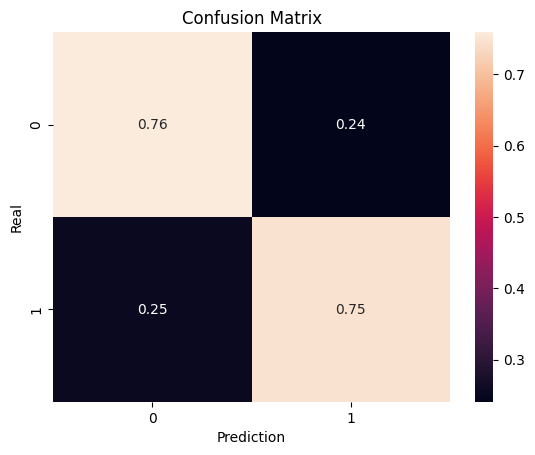

In [169]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real')
ax.set_xlabel('Prediction')
plt.show()

So, this model performance in predicting creditworthiness, differentiating between good and bad payers, exhibits a reasonably balanced performance. It achieves a weighted average F1-score of 0.76, indicating its ability to strike a balance between precision and recall, which is crucial in credit risk.

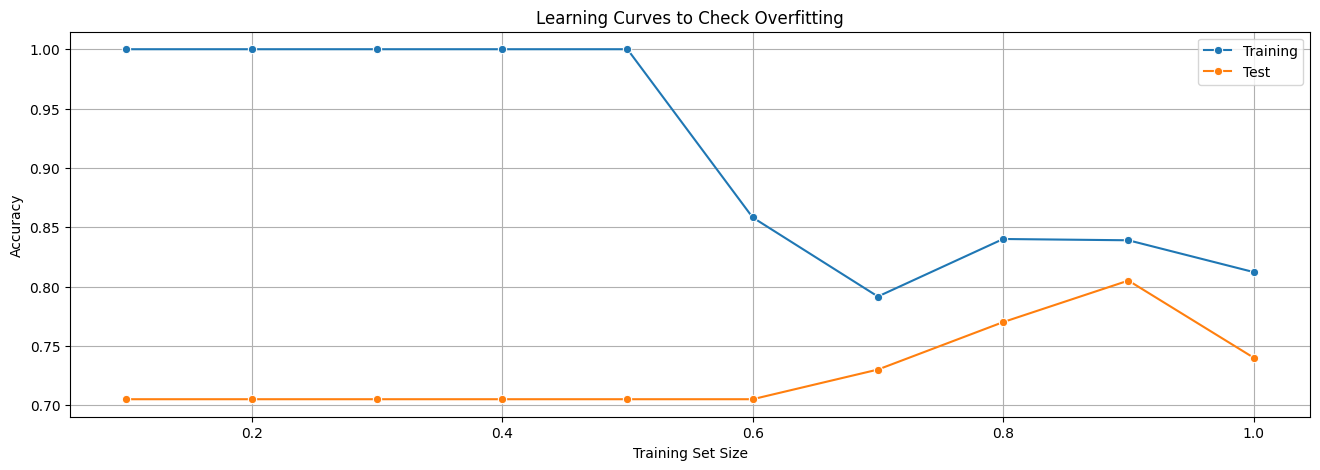

In [158]:
check_overfitting(best_random_forest, X_train_balanced, X_test, y_test)

Presently, our model is no longer excessively focused on memorizing specific features during training, leading to an enhanced ability to generalize. <br>

This trend is notably reflected in the learning curves, where we observe a convergence toward a consistent accuracy value. <br>

Consequently, we have successfully mitigated the issue of overfitting. While the overall accuracy of the model may have marginally decreased in comparison to its previous state, we have achieved a substantial enhancement in its capacity to correctly identify instances of 'bad' credit (1 BAD), resulting in a notable increase in the true negative rate. <br>

To further enhance our model, we should examine the vectors that experienced misclassifications and delve into a detailed analysis of the root causes, including investigating the potential impact of specific features on these misclassifications.<br>

Additionally, acquiring a larger volume of training data would be beneficial. Nevertheless, we have achieved a excelent model that effectively classifies true positive values.

## Interpreting the model results with feature importances

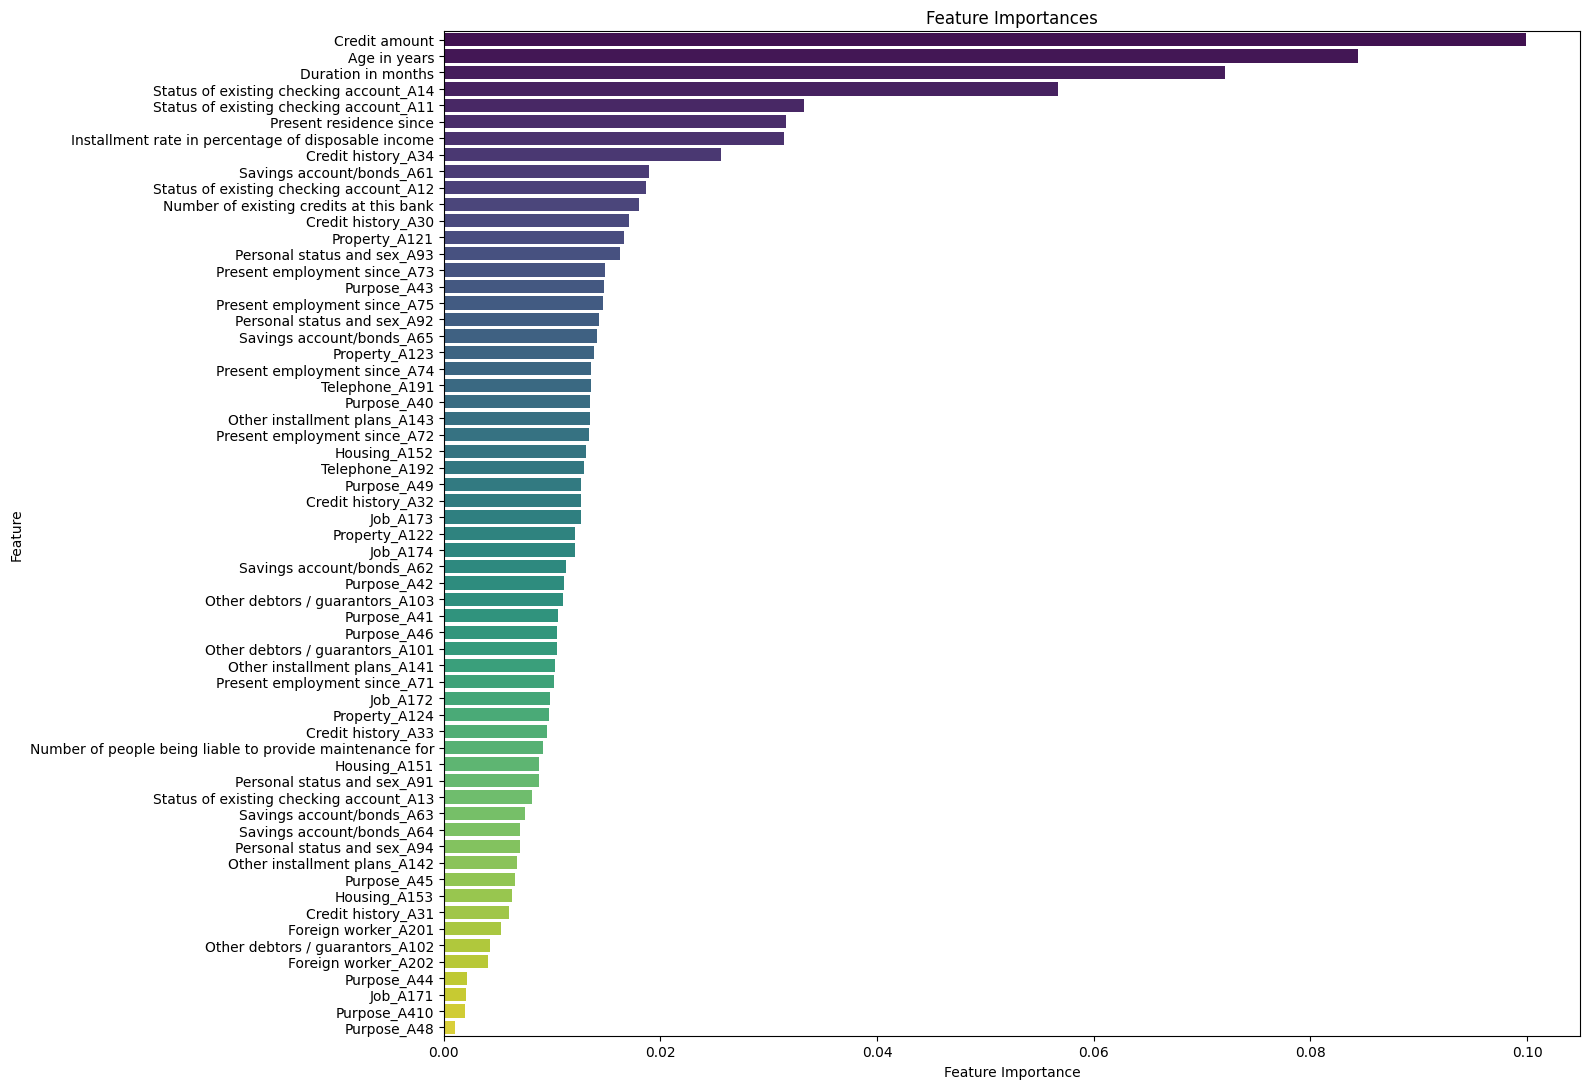

In [132]:
feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in ascending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
a =1
# Plot the feature importances
plt.figure(figsize=(16, 11))
sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h', palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Notably, features like **Credit amount,** **Age in years,** and **Duration in months** emerge as pivotal indicators for assessing an individual's creditworthiness. 

Additionally, the status of the existing checking account, credit history, and the purpose of the credit application also hold substantial weight in shaping the model's predictions.

It's noteworthy that certain features, such as **Foreign worker_A202** and **Purpose_A410,** receive relatively lower importance scores, indicating their limited impact on the classification outcome.

Once more, it would be beneficial to understand the meaning behind each abbreviation to enhance our context for Exploratory Data Analysis (EDA) and model improvement.

## Visualizing the probabilities

Below I get the top 10 customers with respect to highest and lowest Random Forest model's estimated probabilities of being bad risk. As we can see, the model results are coherent! Sometimes it makes errors, but mostly it is correct with respect to risky clients.

Top 10 customers with highest model's estimated probabilities of being bad risk.

In [173]:
predicted_probas = random_forest_model.predict_proba(X_test)

bad_risk_probas = predicted_probas[:, 1]

probas_df = pd.concat([X_test, y_test], axis=1)
probas_df['Bad Risk Probas'] = bad_risk_probas
probas_df.sort_values(['Bad Risk Probas'], ascending=False).head(10)

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_A11,Status of existing checking account_A12,Status of existing checking account_A13,...,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign worker_A201,Foreign worker_A202,Credit risk,Bad Risk Probas
522,48,7119,3,4,53,2,2,1,0,0,...,0,0,1,0,1,0,1,0,1,0.91
63,48,14421,2,2,25,1,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0.80
528,36,2302,4,4,31,1,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0.76
740,24,2325,2,3,32,1,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0.75
822,36,2712,2,2,41,1,2,1,0,0,...,0,0,1,0,1,0,1,0,1,0.71
938,60,6288,4,4,42,1,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0.71
76,42,3965,4,3,34,1,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0.70
998,45,1845,4,4,23,1,1,1,0,0,...,0,0,1,0,0,1,1,0,1,0.70
10,12,1295,3,1,25,1,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0.70
221,12,1200,4,4,23,1,1,1,0,0,...,0,0,1,0,0,1,1,0,0,0.67
